In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os

In [3]:
from keras.layers import Dense,BatchNormalization,Input,LeakyReLU,Activation,Dropout
from keras import Model
from keras.optimizers import Adam
from keras.regularizers import l2


Using TensorFlow backend.


In [4]:
#Defining the dataset directories.
train_dataset_dir=r'UCI HAR Dataset\train'
test_dataset_dir=r'UCI HAR Dataset\test'


In [5]:
#Preparing training dataset
x_train=np.loadtxt(os.path.join(train_dataset_dir,'x_train.txt'))

y_train=np.loadtxt(os.path.join(train_dataset_dir,'y_train.txt')).reshape(7352,1)
#Selecting the necessary feature
x_train_orig=np.concatenate((x_train[:,19:25],x_train[:,37:40],x_train[:,59:65],x_train[:,77:80],x_train[:,117:120],x_train[:,197:200],x_train[:,344:347],x_train[:,363:366],x_train[:,443:445],x_train[:,502:504],x_train[:,515:517],x_train[:,528:530],x_train[:,541:543],x_train[:,554:]),axis=-1)

In [6]:
x_train.shape

(7352, 561)

In [7]:
#Preparing test dataset
x_test=np.loadtxt(os.path.join(test_dataset_dir,'x_test.txt'))
y_test=np.loadtxt(os.path.join(test_dataset_dir,'y_test.txt')).reshape(2947,1)
#Selecting necessary features
x_test_orig=np.concatenate((x_test[:,19:25],x_test[:,37:40],x_test[:,59:65],x_test[:,77:80],x_test[:,117:120],x_test[:,197:200],x_test[:,344:347],x_test[:,363:366],x_test[:,443:445],x_test[:,502:504],x_test[:,515:517],x_test[:,528:530],x_test[:,541:543],x_test[:,554:]),axis=-1)

In [8]:
y_train=keras.utils.to_categorical(y_train).reshape(7352,7)

y_test=keras.utils.to_categorical(y_test).reshape(2947,7)


In [9]:
print(y_train.shape)

(7352, 7)


In [10]:
y_train_orig=y_train[:,1:]
y_test_orig=y_test[:,1:]
print(y_train_orig.shape,y_test_orig.shape)

(7352, 6) (2947, 6)


In [11]:
print(y_train_orig.shape)

(7352, 6)


In [12]:
#Writing a callback function 
class Mycallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epochs,logs={}):
        if logs.get('acc')>=.99:
            self.model.stop_training=True
callback=Mycallback()

In [18]:
#Keras Functional API
def Mymodel(input_shape):
    X_inp=Input(input_shape)
   
    X=Dense(400,activation='relu')(X_inp)
    X=Dropout(.2)(X)
    X=Dense(320,activation='relu')(X)
    
    
    X=Dense(160,activation='relu')(X)
    X=Dropout(.1)(X)
    X=Dense(72,activation='relu')(X)
    X=Dropout(.2)(X)
    X=Dense(6,activation='softmax')(X)
    mymodel=Model(inputs=X_inp,outputs=X)
    return mymodel

In [19]:
#Defining a model
model_1=Mymodel([561])


In [20]:
#Printing summary
model_1.summary()




Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 561)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 400)               224800    
_________________________________________________________________
dropout_3 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 320)               128320    
_________________________________________________________________
dense_9 (Dense)              (None, 160)               51360     
_________________________________________________________________
dropout_4 (Dropout)          (None, 160)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 72)                1159

In [23]:
#Compiling the model
model_1.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['acc'])

In [24]:
#Model Training
hist=model_1.fit(x_train,y_train_orig,epochs=150,callbacks=[callback])

Epoch 1/150
7352/7352 [==============================] - 3s 354us/step - loss: 0.0454 - acc: 0.9823
Epoch 2/150
7352/7352 [==============================] - 3s 341us/step - loss: 0.0454 - acc: 0.9827
Epoch 3/150
7352/7352 [==============================] - 3s 341us/step - loss: 0.0429 - acc: 0.9845
Epoch 4/150
7352/7352 [==============================] - 2s 338us/step - loss: 0.0411 - acc: 0.9844
Epoch 5/150
7352/7352 [==============================] - 2s 339us/step - loss: 0.0398 - acc: 0.9852
Epoch 6/150
7352/7352 [==============================] - 3s 340us/step - loss: 0.0383 - acc: 0.9863
Epoch 7/150
7352/7352 [==============================] - 3s 341us/step - loss: 0.0394 - acc: 0.9867
Epoch 8/150
7352/7352 [==============================] - 3s 341us/step - loss: 0.0402 - acc: 0.9837
Epoch 9/150
7352/7352 [==============================] - 3s 342us/step - loss: 0.0402 - acc: 0.9860
Epoch 10/150
7352/7352 [==============================] - 3s 362us/step - loss: 0.0393 - acc: 0.9859

Text(0, 0.5, 'loss')

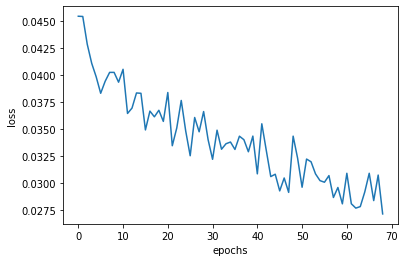

In [25]:

plt.plot(hist.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')


In [27]:
loss,acc=model_1.evaluate(x_test,y_test_orig)

2947/2947 [==============================] - 1s 254us/step


In [30]:
print(acc*100,loss)

95.75839638710022 0.18903594496787646
